ANN for NARX

In [11]:
import numpy as np
from matplotlib import pyplot as plt
import torch
from torch import nn
from scipy.io import loadmat
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel, ExpSineSquared
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, Normalizer
from sklearn.linear_model import LinearRegression

out = loadmat(f'UnbalancedDisk-sim-data.mat') 
x = out['ulist'][0,:]
y = out['ylist'][0,:] 
x=x[0:3000]
y=y[0:3000]

In [12]:
na, nb = 2, 2
ulist = x
ylist = y
def make_training_data(ulist,ylist,na,nb):
    Xdata = []
    Ydata = []
    
    for k in range(max(na,nb),len(ulist)): 
        Xdata.append(np.concatenate([ulist[k-nb:k],ylist[k-na:k]])) 
        Ydata.append(ylist[k])
    return np.array(Xdata), np.array(Ydata)

Xdata, Ydata = make_training_data(ulist,ylist, na, nb)

from sklearn.model_selection import train_test_split 
Xtrain, Xval, Ytrain, Yval = train_test_split(Xdata, Ydata) 

In [13]:
class Network(nn.Module):
    def __init__(self, n_in=4, n_neurons=32):
        super(Network,self).__init__()
        self.lay1 = nn.Linear(n_in,n_neurons).double()
        self.lay2 = nn.Linear(n_neurons,1).double()
    
    def forward(self,u):
        x1 = torch.sigmoid(self.lay1(u)) 
        y = self.lay2(x1)[:,0] 
        return y

In [14]:
X_data=torch.from_numpy(Xtrain)
Y_data=torch.from_numpy(Ytrain)
X_val=torch.from_numpy(Xval)
Y_val=torch.from_numpy(Yval)

In [15]:
model = Network()
print(model)
parameters = list(model.parameters())
print(parameters) 

optimizer = torch.optim.Adam(model.parameters(),lr=1e-4) 
for epoch in range(20000):
    Loss = torch.mean((model(X_data)-Y_data)**2) 
    optimizer.zero_grad()
    Loss.backward() 
    optimizer.step() 
    if epoch%1000==0: 
       print(f'epoch={epoch} Loss={Loss}')

Network(
  (lay1): Linear(in_features=4, out_features=32, bias=True)
  (lay2): Linear(in_features=32, out_features=1, bias=True)
)
[Parameter containing:
tensor([[-0.1463,  0.4077,  0.0315, -0.4790],
        [ 0.0134, -0.3379,  0.1509, -0.3478],
        [-0.0129, -0.2275, -0.2590,  0.0770],
        [ 0.4494,  0.0862,  0.0641,  0.3163],
        [-0.1230, -0.0570,  0.2182, -0.0728],
        [-0.0990,  0.3694, -0.0520,  0.3124],
        [ 0.0456,  0.2546, -0.4033,  0.3942],
        [ 0.4330,  0.1734,  0.0902, -0.4844],
        [-0.3747, -0.4215,  0.4133, -0.4838],
        [ 0.4239, -0.3764, -0.4802, -0.0851],
        [-0.1648, -0.3210, -0.4722,  0.0946],
        [ 0.1135,  0.1998,  0.2952,  0.2077],
        [-0.1999,  0.4028,  0.4969,  0.4373],
        [-0.0975, -0.3375, -0.3331, -0.2355],
        [-0.3367,  0.2535, -0.0979,  0.1925],
        [-0.1732,  0.2811,  0.4699, -0.0043],
        [ 0.2109, -0.1761,  0.2243, -0.3453],
        [ 0.2251,  0.0593, -0.3479, -0.1141],
        [ 0.4476, 

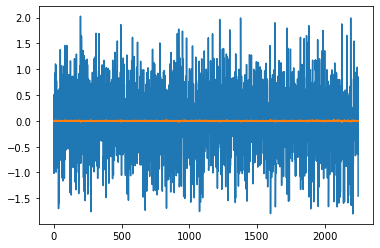

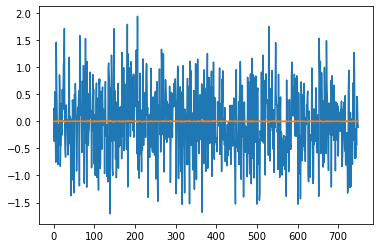

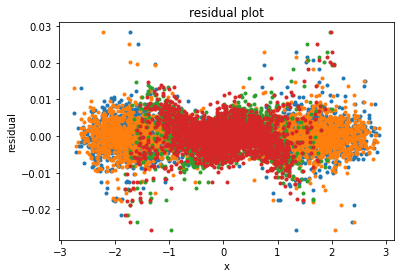

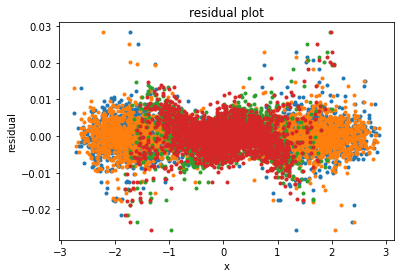

In [16]:
with torch.no_grad():
    plt.plot(model(X_data),label='predicted')
    plt.plot(model(X_data)-Y_data,label='error')  
    plt.show()

    plt.plot(model(X_val),label='predicted')
    plt.plot(model(X_val)-Y_val,label='error')     
    plt.show()

    plt.title('residual plot')
    plt.xlabel('x')
    plt.ylabel('residual')
    plt.plot(X_data,Y_data-model(X_data),'.')
    plt.show()

    plt.title('residual plot')
    plt.xlabel('x')
    plt.ylabel('residual')
    plt.plot(X_data,Y_data-model(X_data),'.')
    plt.show()
    
